# Imports + settings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
num_of_rois = 7
roi_names = [f"ROI_{i+1}" for i in range(num_of_rois)]
meta_data = pd.read_csv(f'../../data.nosync/phenotypic/subjects_with_meta_{num_of_rois}.csv',
                         index_col= 'Unnamed: 0')
meta_data['Sub ID'] = meta_data['Sub ID'].apply(lambda x: str(x).zfill(7))
meta_data.shape

(660, 8)

# Participant stats

### Take-aways

[WRITE SOME STUFF HERE WHEN THE META DATA IS SORTED OUT]

In [3]:
participants = meta_data.drop_duplicates(subset=['Sub ID', 'Dataset'])
participants['Co-Diagnosis'] = participants['Co-Diagnosis'].replace({np.nan: ''})
participants.groupby(['Diagnosis','Co-Diagnosis', 'Sex']).agg({'Sex':['count'],
                                                                'IQ':['min', 'max', 'mean', 'std'], 
                                                                'Age':['min', 'max', 'mean', 'std']})


/var/folders/dn/nd5kb8wx3xs44tlt7kst4n7h0000gn/T/ipykernel_32460/220691562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants['Co-Diagnosis'] = participants['Co-Diagnosis'].replace({np.nan: ''})


Sex     IQ                                \
                              count    min    max        mean        std   
Diagnosis Co-Diagnosis Sex                                                 
ADHD                   Female    27   78.0  128.0  106.920000  12.724386   
                       Male      76   73.0  134.0  105.945946  14.895887   
          Other        Female     8   75.0  127.0  107.375000  15.574131   
                       Male      33   82.0  132.0  103.562500  13.452275   
ASD                    Female     7   78.0  134.0  101.428571  22.618997   
                       Male      50   67.0  137.0  101.740000  17.090169   
          ADHD         Female     3   74.0  132.0  106.666667  29.687259   
                       Male      34   75.0  148.0  110.909091  17.782301   
          Other        Female     3   91.0  118.0  102.333333  14.011900   
                       Male      20   80.0  142.0  110.400000  16.368776   
TD                     Female    75   80.0  140.0  109.690141  14.740219   
                       Male     146   80.0  144.0  113.524476  13.479683   
          Other        Female     1  101.0  101.0  101.000000        NaN   
                       Male       5   81.0  129.0  117.400000  20.427922   

                                  Age                               
                                  min    max       mean        std  
Diagnosis Co-Diagnosis Sex                                          
ADHD                   Female   7.350  17.15  10.351481   2.553156  
                       Male     7.260  17.61  11.201842   2.744991  
          Other        Female   8.610  13.24  10.936250   1.807413  
                       Male     7.240  17.37  11.537576   2.739780  
ASD                    Female   5.220  34.76  14.442857   9.680924  
                       Male     5.320  39.10  12.828120   6.696238  
          ADHD         Female  10.000  38.76  20.174667  16.119519  
                       Male     5.928  26.62  10.593176   5.348535  
          Other        Female   6.750  24.41  17.990000   9.766944  
                       Male     5.920  29.18  13.570500   5.769673  
TD                     Female   5.907  29.13  12.996893   4.821956  
                       Male     5.887  30.78  13.184863   5.333637  
          Other        Female   8.100   8.10   8.100000        NaN  
                       Male     7.190  16.93  12.868000   3.963158

# Plot distribution of voxels

### Take-aways:
When we look at the std/mean ratio, we can see that most of the regions does not vary that much, 1-2%. However the ration for ROI 5, has a ratio of approxmiately 26\%. When investigating ROI 5 along with the age, it is clear that there is some sort of correlation between the size of this ROI and the age. This could be due to the parcelation mask being made for adults?

Looking at the total number of voxels, plottet against age, we see that there is a correlation between age and the number of voxels. Mainly that the younger the subject is, the more voxels there is.

In [4]:
num_of_voxels = pd.read_csv(f'../../data.nosync/stats/num_of_voxels_pr_timestep_{num_of_rois}.csv',
                            index_col= 'Unnamed: 0')
num_of_voxels['Sub ID'] = num_of_voxels['Sub ID'].apply(lambda x: str(x).zfill(7))
num_of_voxels['Total'] = num_of_voxels[roi_names].sum(axis = 1)
num_of_voxels = pd.merge(num_of_voxels, meta_data, how="left", on=['Sub ID', 'Dataset'])

In [5]:
stats_voxels = num_of_voxels[roi_names+['Total']].describe()

In [6]:
stats_voxels = stats_voxels.T.reset_index()
stats_voxels = stats_voxels[['index', 'mean', 'std']]
stats_voxels['ratio'] = stats_voxels['std']/stats_voxels['mean']*100
stats_voxels

,index,mean,std,ratio
0,ROI_1,6129.250499,130.750971,2.133229
1,ROI_2,5660.366267,79.502540,1.404548
2,ROI_3,4308.987026,92.363185,2.143501
3,ROI_4,3995.587824,36.701223,0.918544
4,ROI_5,1646.654691,435.816203,26.466764
5,ROI_6,5419.527944,106.400849,1.963286
6,ROI_7,8319.417166,225.718477,2.713153
7,Total,35479.791417,889.830131,2.507991


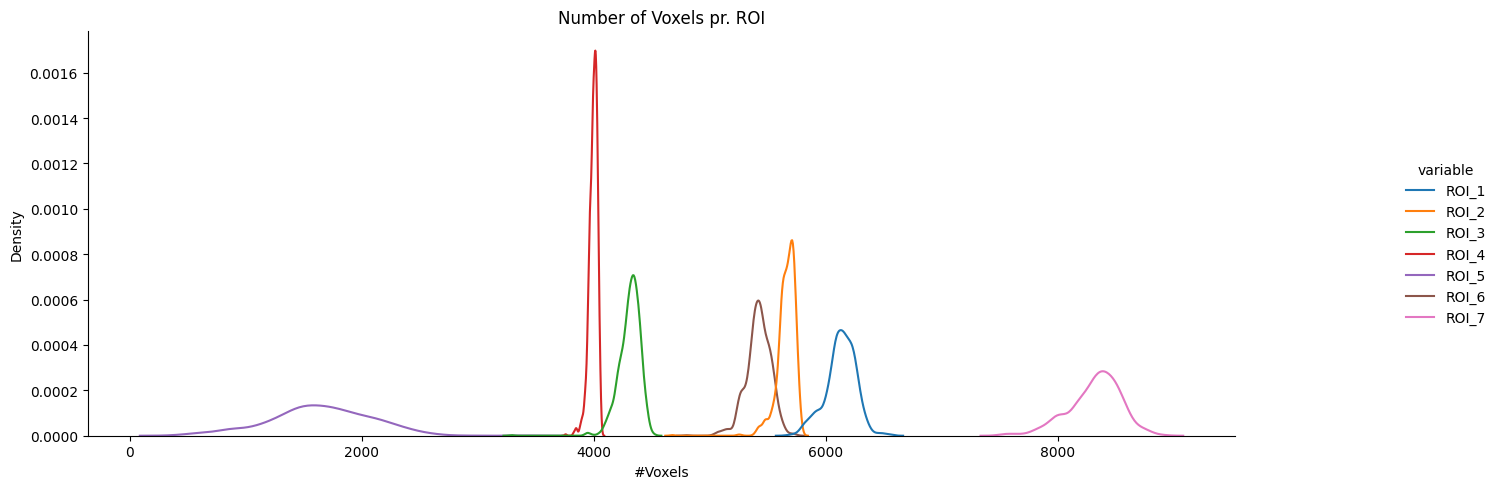

In [7]:
melted = num_of_voxels[roi_names].melt()

# setting the dimensions of the plot
p = sns.displot(data = melted,
            x='value',
            hue='variable',
            kind="kde")
p.set(title='Number of Voxels pr. ROI', xlabel= '#Voxels')
p.fig.set_figwidth(15)
p.fig.set_figheight(5)
p.tight_layout()
p.savefig(f'../pics/{num_of_rois} ROIs/Number_voxels_pr_roi_dist.png', dpi = 300)

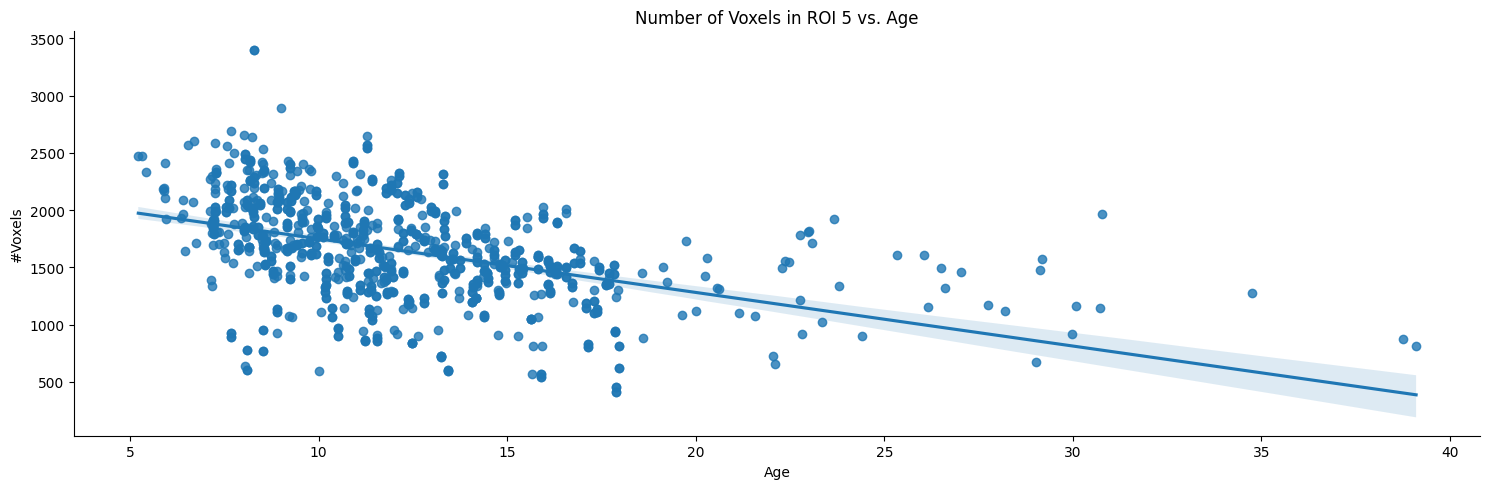

In [8]:
# setting the dimensions of the plot
p = sns.lmplot(data = num_of_voxels,
                    x='Age',
                    y='ROI_5')
p.set(title='Number of Voxels in ROI 5 vs. Age', xlabel= 'Age', ylabel='#Voxels')
p.fig.set_figwidth(15)
p.fig.set_figheight(5)
p.tight_layout()
p.savefig(f'../pics/{num_of_rois} ROIs/ROI5_voxels_age.png', dpi = 300)

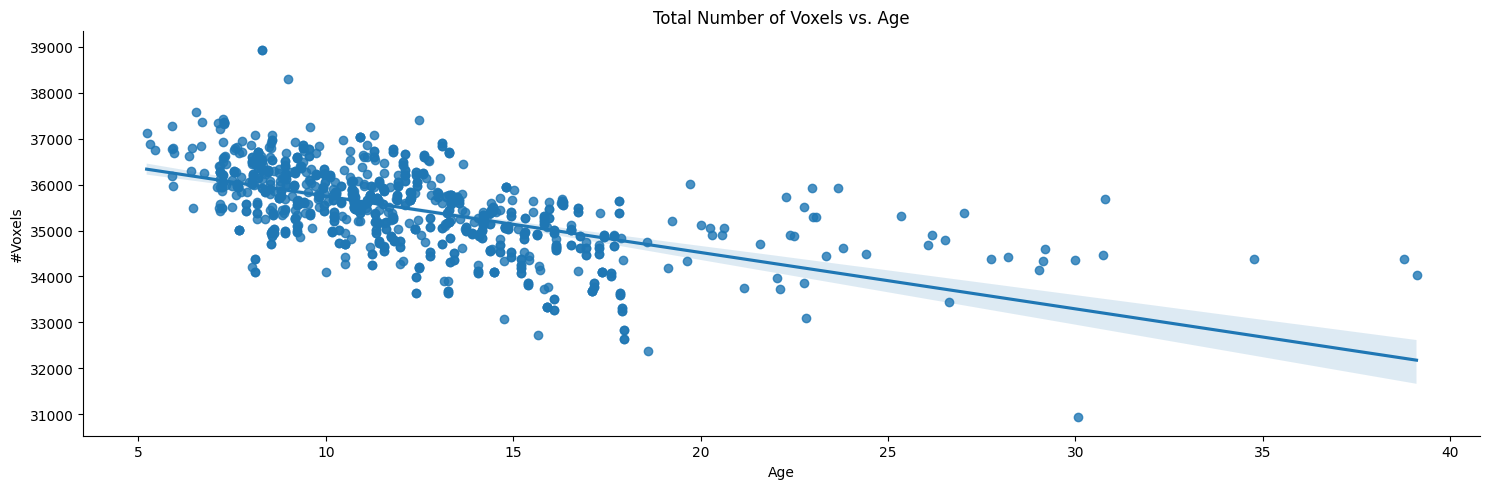

In [9]:
# setting the dimensions of the plot
p = sns.lmplot(data = num_of_voxels,
                    x='Age',
                    y='Total')
p.set(title='Total Number of Voxels vs. Age', xlabel= 'Age', ylabel='#Voxels')
p.fig.set_figwidth(15)
p.fig.set_figheight(5)
p.tight_layout()
p.savefig(f'../pics/{num_of_rois} ROIs/Total_voxels_age.png', dpi = 300)

# Binning and correlation

In [10]:
meta_data.iloc[1].file_path.replace('clean','stats').replace('bold.npz', 'b.csv')

'data.nosync/stats/ABIDEI_7/sub-0050953_ses-1_task-rest_run-1_space-MNI152NLin6ASym_desc-preproc_b.csv'

In [11]:
file_list = meta_data.copy()
file_list['file_path'] = file_list['file_path'].apply(lambda x: '../../' + x.replace('clean','stats').replace('bold.npz', 'b.csv'))

file_list['Co-Diagnosis'] = file_list['Co-Diagnosis'].apply(lambda x: str(x))
file_list['Full Diagnosis'] = file_list['Diagnosis'] + '+' + file_list['Co-Diagnosis']
file_list['Full Diagnosis'] = file_list['Full Diagnosis'].apply(lambda x: x.replace('+nan','').replace('TD+Other', 'TD'))


In [12]:
bins = [1/(n+1) for n in range(17)]
#[10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 25, 29, 35, 44, 59, 88, 176]
#bin_sizes = list(set([int(round(i*176)) for i in bins]))
#bin_sizes.sort()

bin_sizes = [10, 15, 20, 25, 30, 35, 45, 60, 88, 172]


#Make for loop

final_data_dict = {}

#For each diagnosis
for diag in file_list['Full Diagnosis'].unique():
    print(diag)
    temp_subs = file_list[file_list['Full Diagnosis'] == diag]
    diag_data = []
    #for each subject
    for idx, row in temp_subs.iterrows():
        test_sub = pd.read_csv(row['file_path'], delimiter = ';', index_col = 'Unnamed: 0')
        scan_length = test_sub.shape[0]
        for bin in bin_sizes:
            time = 1
            #add each bin step
            for i in range(bin, scan_length, bin+1):
                means = test_sub.iloc[i-bin:i].mean().to_dict()
                means['Time'], means['Bin'], means['Subject'], means['Dataset'], means['Full Diagnosis'] = time, bin, row['Sub ID'], row['Dataset'], diag 
                diag_data.append(means)
                time += 1
            #Add the remaning timesteps
            means = test_sub.iloc[i+1:scan_length].mean().to_dict()
            means['Time'], means['Bin'], means['Subject'], means['Dataset'], means['Full Diagnosis'] = time, bin, row['Sub ID'], row['Dataset'], diag 
            diag_data.append(means)
    final_data_dict[diag] = pd.DataFrame(diag_data)

#Save files
for key, value in final_data_dict.items():
    value.to_csv(f'../../data.nosync/stats/bins_{num_of_rois}/{key}.csv')

ASD
ASD+ADHD
ASD+Other
TD
ADHD
ADHD+Other


In [13]:
final_data_dict['ASD'][final_data_dict['ASD']['Bin'] == 176][roi_names].corr()

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7
ROI_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
coor_data_dict = {}
coor_mask = np.triu(np.ones((num_of_rois,num_of_rois), dtype=bool), 1)

#For each diagnosis
for key, value in final_data_dict.items():
    print(key)
    temp_dataset = final_data_dict[key]
    #Get subjects
    subjects = set(zip(temp_dataset['Subject'].tolist(), temp_dataset['Dataset'].tolist()))
    #Make list of dataframes
    subjects_data_coor = []
    #For each subject
    for sub in subjects:
        subject_data = temp_dataset[(temp_dataset['Subject'] == sub[0]) & (temp_dataset['Dataset'] == sub[1])]
        #For each bin size
        for bin in bin_sizes:
            correlation_matrix = subject_data[subject_data['Bin']==bin][roi_names].corr().to_numpy()
            #Mask dataframe
            sub_coor_values = pd.DataFrame(correlation_matrix[coor_mask], columns=['Coor_value'])
            #Add bin
            sub_coor_values['bin'] = bin
            #Add to data
            subjects_data_coor.append(sub_coor_values)
    coor_data_dict[key] = pd.concat(subjects_data_coor).reset_index()

ASD
ASD+ADHD
ASD+Other
TD
ADHD
ADHD+Other


In [15]:
for key, value in coor_data_dict.items():
    temp_data = coor_data_dict[key]
    for i in temp_data.bin.unique():
        print(f"Diagnosis: {key}, bin: {i}, variance: {temp_data[temp_data['bin'] == i]['Coor_value'].var()}")

Diagnosis: ASD, bin: 10, variance: 0.16816842572790575
Diagnosis: ASD, bin: 15, variance: 0.23898236561531183
Diagnosis: ASD, bin: 20, variance: 0.24767184688782318
Diagnosis: ASD, bin: 25, variance: 0.25501122657403613
Diagnosis: ASD, bin: 30, variance: 0.27170441295186587
Diagnosis: ASD, bin: 35, variance: 0.308176011186141
Diagnosis: ASD, bin: 45, variance: 0.4190633621183866
Diagnosis: ASD, bin: 60, variance: 0.5591452472965296
Diagnosis: ASD, bin: 88, variance: 0.9934255929679273
Diagnosis: ASD, bin: 172, variance: 0.9950517318938373
Diagnosis: ASD+ADHD, bin: 10, variance: 0.17527904793449864
Diagnosis: ASD+ADHD, bin: 15, variance: 0.2294197090443233
Diagnosis: ASD+ADHD, bin: 20, variance: 0.2610783686304742
Diagnosis: ASD+ADHD, bin: 25, variance: 0.24974358685043688
Diagnosis: ASD+ADHD, bin: 30, variance: 0.27804493542040976
Diagnosis: ASD+ADHD, bin: 35, variance: 0.30749576370829407
Diagnosis: ASD+ADHD, bin: 45, variance: 0.39100357854682616
Diagnosis: ASD+ADHD, bin: 60, varianc

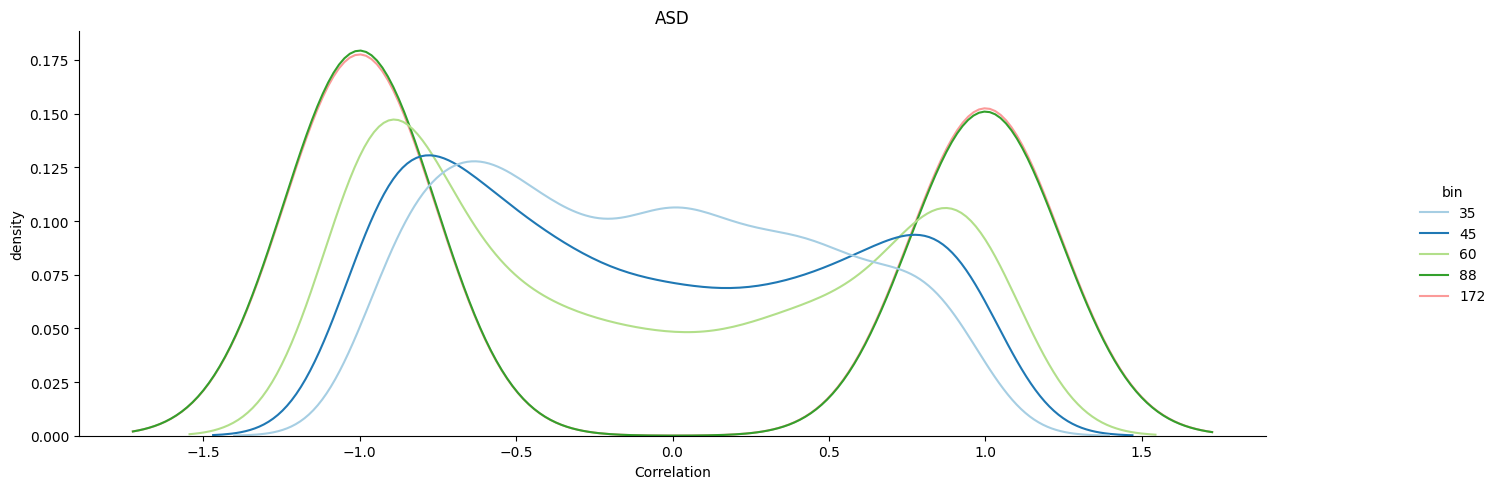

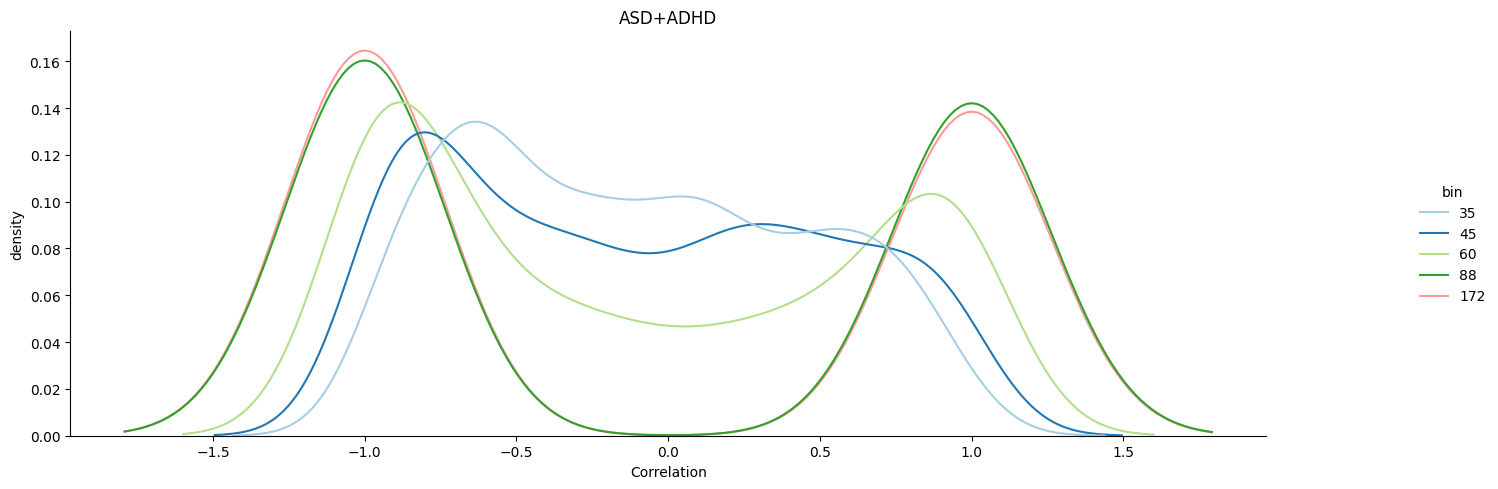

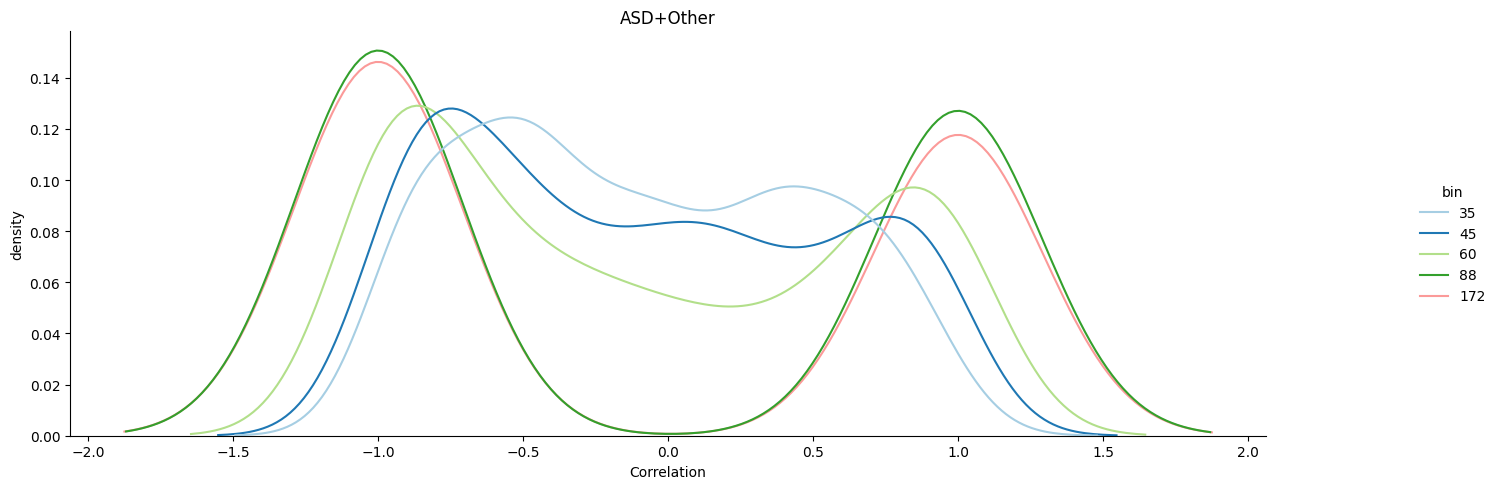

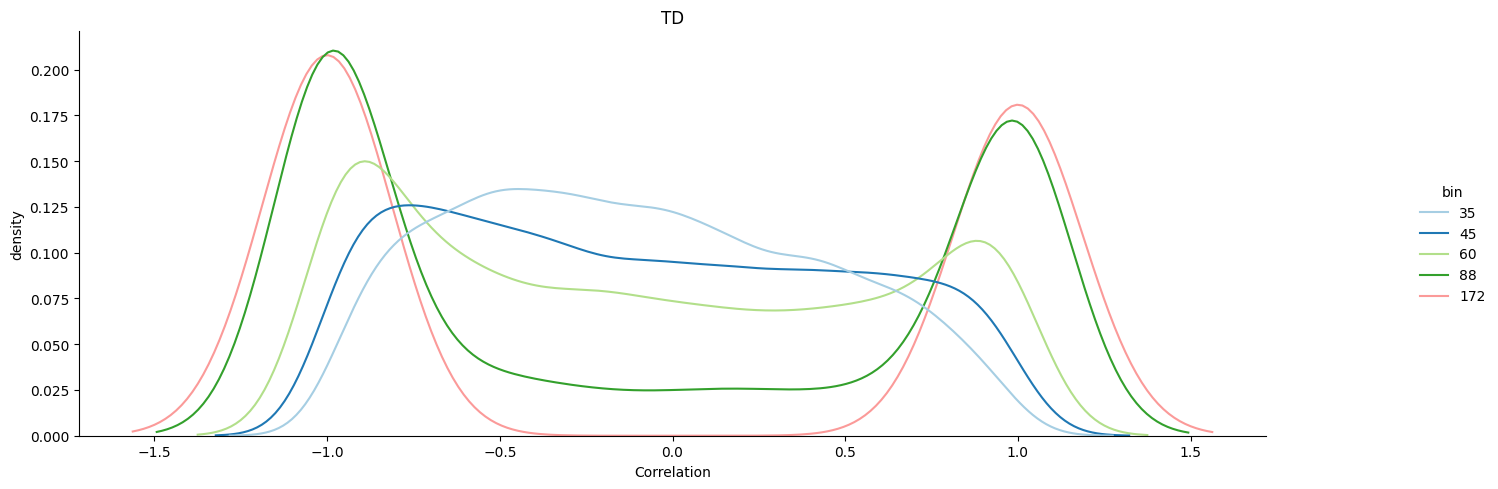

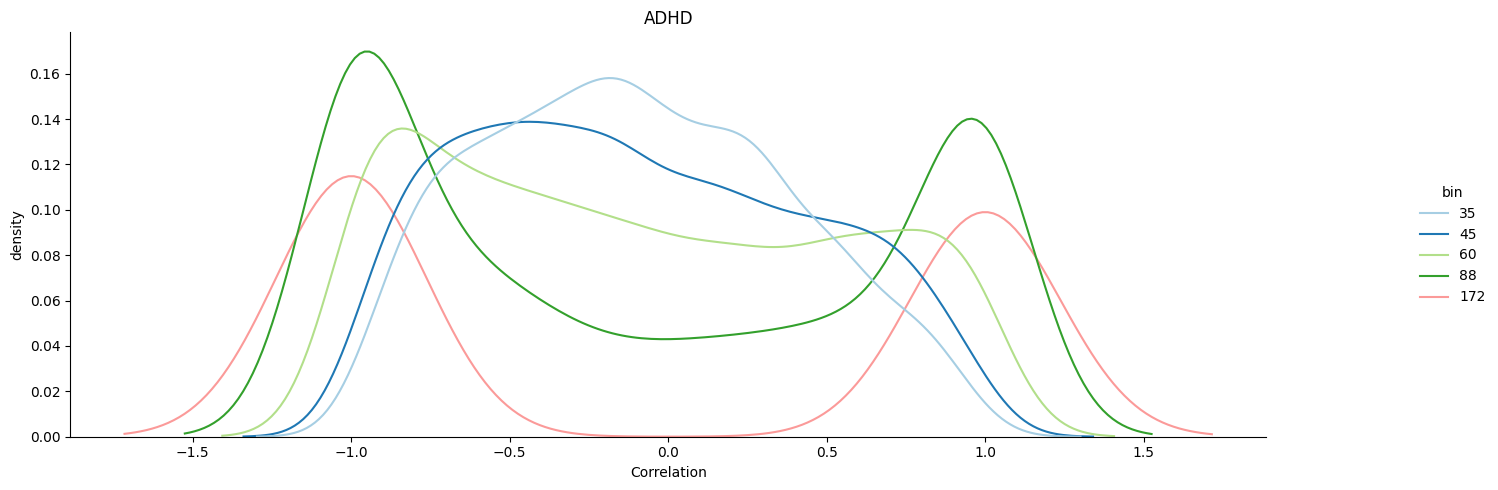

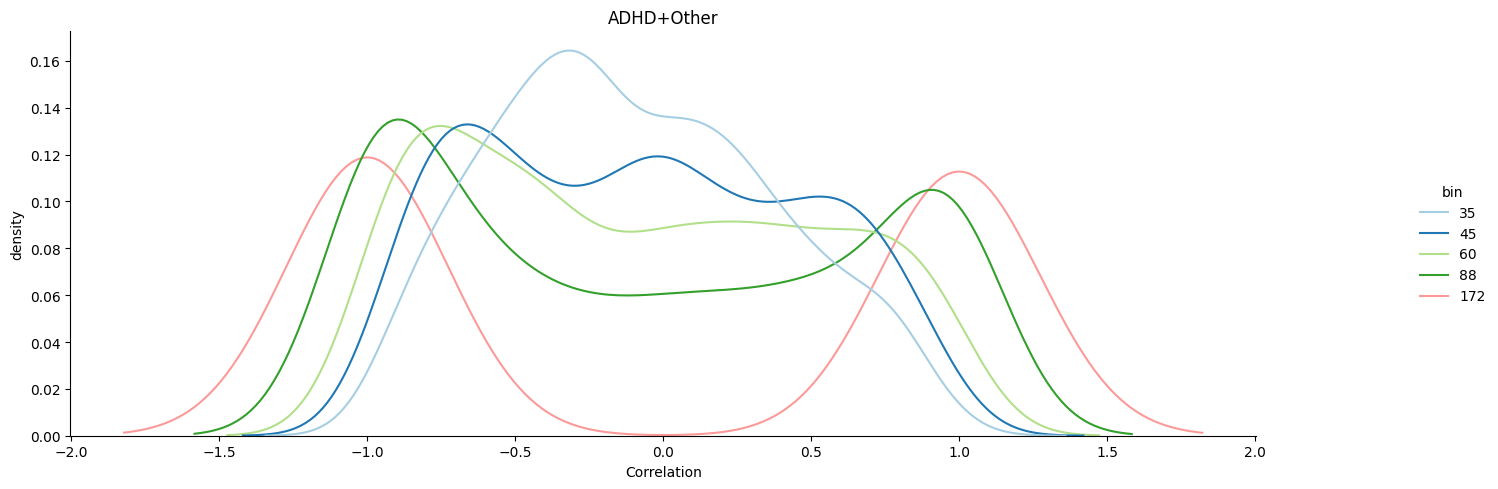

In [16]:
for key, value in coor_data_dict.items():
    temp_data = coor_data_dict[key]
    p = sns.displot(data = temp_data[temp_data['bin'] >= 35],
                x='Coor_value',
                hue='bin',
                kind="kde",
                palette= "Paired")
    p.set(title=key, xlabel= 'Correlation', ylabel='density')
    p.fig.set_figwidth(15)
    p.fig.set_figheight(5)
    p.tight_layout()
